# tutorials for NN

Following these tutorials (in order)
* LSTM Time Series Forecasting https://www.youtube.com/watch?v=c0k-YLQGKjY
* Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs https://www.youtube.com/watch?v=kGdbPnMCdOg

**Upon further review, I am CONCERNED about this. I'm not sure it actually separates out the outputs from the inputs.** It's possible I've misunderstood quite badly, so I'm going to go do a bunch more reading

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-14 13:07:43.120008: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 13:07:44.478517: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 13:07:44.478600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 13:07:44.482820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 13:07:45.505421: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 13:07:45.508498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')
df.reset_index(inplace=True,drop=True)
df.head(15)

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
0,2006-02-07,91.0100,21.65,9420.0,0.00,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.0000,0.00,0.0
1,2006-02-08,91.0429,21.64,9380.0,0.00,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.0000,0.00,0.0
2,2006-02-09,91.1096,21.58,9210.0,0.00,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.7175,17.22,0.0
3,2006-02-10,91.1954,21.46,8830.0,0.00,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.0000,0.00,0.0
4,2006-02-11,91.3012,21.36,8550.0,0.00,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.0000,0.00,0.0
5,2006-02-12,91.4004,21.28,8330.0,0.00,31.932083,43.92,24.57,1035.333333,68.041667,87.0,44.0,6.179583,9.17,3.36,0.0000,0.00,0.0
6,2006-02-13,91.5129,21.10,7820.0,0.10,31.004848,35.42,26.37,1025.878788,91.121212,96.0,81.0,7.274242,19.46,0.00,0.0000,0.00,0.0
7,2006-02-14,91.6071,20.97,7460.0,0.00,25.755417,35.42,18.34,1021.125000,76.083333,98.0,51.0,7.147917,10.29,3.36,0.0000,0.00,0.0
8,2006-02-15,91.7167,20.91,7300.0,0.00,25.828750,35.62,17.37,1019.750000,66.083333,88.0,33.0,6.552083,10.29,3.36,0.0000,0.00,0.0
9,2006-02-16,91.7925,20.81,7040.0,0.06,22.394400,27.81,12.18,1023.360000,65.240000,85.0,31.0,13.198800,26.17,2.24,8.4468,33.11,0.0


In [3]:
df.index = df.date
df

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
date,,,,,,,,,,,,,,,,,,
2006-02-07,2006-02-07,91.0100,21.65,9420.0,0.0,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.000000,0.00,0.0
2006-02-08,2006-02-08,91.0429,21.64,9380.0,0.0,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.000000,0.00,0.0
2006-02-09,2006-02-09,91.1096,21.58,9210.0,0.0,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.717500,17.22,0.0
2006-02-10,2006-02-10,91.1954,21.46,8830.0,0.0,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.000000,0.00,0.0
2006-02-11,2006-02-11,91.3012,21.36,8550.0,0.0,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02,2018-06-02,79.4696,21.84,10000.0,0.0,62.812083,77.25,46.35,1022.750000,48.333333,83.0,24.0,6.976250,11.50,3.44,0.000000,0.00,0.0
2018-06-03,2018-06-03,80.0721,21.59,9240.0,0.0,69.826250,86.25,52.66,1013.875000,46.416667,79.0,23.0,10.141667,21.92,3.44,3.165833,29.97,0.0
2018-06-04,2018-06-04,80.4046,21.50,8970.0,0.0,62.956250,71.67,56.35,1012.833333,41.666667,65.0,18.0,14.850000,23.04,8.05,4.030417,28.77,0.0


In [4]:
df.index

DatetimeIndex(['2006-02-07', '2006-02-08', '2006-02-09', '2006-02-10',
               '2006-02-11', '2006-02-12', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06'],
              dtype='datetime64[ns]', name='date', length=4503, freq=None)

date
2006-02-07    91.0100
2006-02-08    91.0429
2006-02-09    91.1096
2006-02-10    91.1954
2006-02-11    91.3012
               ...   
2018-06-02    79.4696
2018-06-03    80.0721
2018-06-04    80.4046
2018-06-05    80.6565
2018-06-06    80.8423
Name: avg_well_depth, Length: 4503, dtype: float64

<Axes: xlabel='date'>

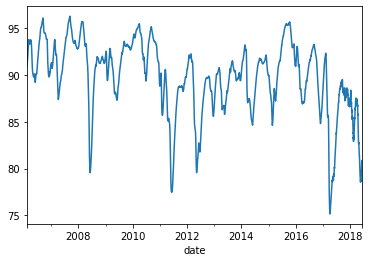

In [5]:
well = df.avg_well_depth
display(well)
well.plot()

In [6]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(well, WINDOW_SIZE)
X.shape, y.shape

((4498, 5, 1), (4498,))

In [8]:
X ,y

(array([[[91.01  ],
         [91.0429],
         [91.1096],
         [91.1954],
         [91.3012]],
 
        [[91.0429],
         [91.1096],
         [91.1954],
         [91.3012],
         [91.4004]],
 
        [[91.1096],
         [91.1954],
         [91.3012],
         [91.4004],
         [91.5129]],
 
        ...,
 
        [[79.1739],
         [79.3908],
         [79.2675],
         [79.4696],
         [80.0721]],
 
        [[79.3908],
         [79.2675],
         [79.4696],
         [80.0721],
         [80.4046]],
 
        [[79.2675],
         [79.4696],
         [80.0721],
         [80.4046],
         [80.6565]]]),
 array([91.4004, 91.5129, 91.6071, ..., 80.4046, 80.6565, 80.8423]))

### Train Test Split

In [9]:
X_train, y_train = X[:3498], y[:3498]
X_val, y_val = X[3498:3998], y[3498:3998]
X_test, y_test = X[3998:], y[3998:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3498, 5, 1), (3498,), (500, 5, 1), (500,), (500, 5, 1), (500,))

In [10]:
X_test, y_test

(array([[[91.0012],
         [91.105 ],
         [91.2146],
         [91.3029],
         [91.3988]],
 
        [[91.105 ],
         [91.2146],
         [91.3029],
         [91.3988],
         [91.4921]],
 
        [[91.2146],
         [91.3029],
         [91.3988],
         [91.4921],
         [91.5775]],
 
        ...,
 
        [[79.1739],
         [79.3908],
         [79.2675],
         [79.4696],
         [80.0721]],
 
        [[79.3908],
         [79.2675],
         [79.4696],
         [80.0721],
         [80.4046]],
 
        [[79.2675],
         [79.4696],
         [80.0721],
         [80.4046],
         [80.6565]]]),
 array([91.4921, 91.5775, 91.6546, 91.7333, 91.7912, 91.8383, 91.8842,
        91.9296, 91.9733, 92.0188, 92.0717, 92.1329, 92.1896, 92.2638,
        92.305 , 92.3433, 92.3467, 92.3033, 92.2133, 92.06  , 91.7813,
        91.4367, 91.1142, 90.8208, 90.5392, 90.2346, 89.8329, 89.3754,
        88.9079, 88.4587, 88.0108, 87.5787, 87.1775, 86.8167, 86.49  ,
        86.2

### Tensorflow things

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

## Build LSTM single variable model

In [12]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2023-11-14 13:08:02.859405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 13:08:02.861198: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
cp = ModelCheckpoint('meremodel1/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp])

Epoch 1/50
101/110 [==========================>...] - ETA: 0s - loss: 6861.6367 - root_mean_squared_error: 82.8350INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 4s 24ms/step - loss: 6734.9087 - root_mean_squared_error: 82.0665 - val_loss: 5082.1763 - val_root_mean_squared_error: 71.2894
Epoch 2/50
 99/110 [==========================>...] - ETA: 0s - loss: 3597.9641 - root_mean_squared_error: 59.9830INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 3463.3840 - root_mean_squared_error: 58.8505 - val_loss: 2054.6555 - val_root_mean_squared_error: 45.3283
Epoch 3/50
 95/110 [========================>.....] - ETA: 0s - loss: 1245.6736 - root_mean_squared_error: 35.2941INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 1159.8573 - root_mean_squared_error: 34.0567 - val_loss: 527.4201 - val_root_mean_squared_error: 22.9656
Epoch 4/50
101/110 [==========================>...] - ETA: 0s - loss: 258.0944 - root_mean_squared_error: 16.0653INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 245.3430 - root_mean_squared_error: 15.6634 - val_loss: 82.3528 - val_root_mean_squared_error: 9.0748
Epoch 5/50
101/110 [==========================>...] - ETA: 0s - loss: 39.4778 - root_mean_squared_error: 6.2831INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 37.7754 - root_mean_squared_error: 6.1462 - val_loss: 14.2322 - val_root_mean_squared_error: 3.7726
Epoch 6/50
101/110 [==========================>...] - ETA: 0s - loss: 13.6899 - root_mean_squared_error: 3.7000INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 13.6839 - root_mean_squared_error: 3.6992 - val_loss: 8.3653 - val_root_mean_squared_error: 2.8923
Epoch 7/50
 98/110 [=========================>....] - ETA: 0s - loss: 11.8690 - root_mean_squared_error: 3.4451INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.1246 - root_mean_squared_error: 3.4820 - val_loss: 7.8335 - val_root_mean_squared_error: 2.7988
Epoch 8/50
 98/110 [=========================>....] - ETA: 0s - loss: 11.2385 - root_mean_squared_error: 3.3524INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 11.2869 - root_mean_squared_error: 3.3596 - val_loss: 7.0996 - val_root_mean_squared_error: 2.6645
Epoch 9/50
100/110 [==========================>...] - ETA: 0s - loss: 9.8330 - root_mean_squared_error: 3.1358INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 9.8566 - root_mean_squared_error: 3.1395 - val_loss: 6.7238 - val_root_mean_squared_error: 2.5930
Epoch 10/50
 99/110 [==========================>...] - ETA: 0s - loss: 8.1839 - root_mean_squared_error: 2.8608INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 8.1606 - root_mean_squared_error: 2.8567 - val_loss: 5.4964 - val_root_mean_squared_error: 2.3444
Epoch 11/50
 98/110 [=========================>....] - ETA: 0s - loss: 6.7850 - root_mean_squared_error: 2.6048INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 6.7093 - root_mean_squared_error: 2.5902 - val_loss: 4.2155 - val_root_mean_squared_error: 2.0532
Epoch 12/50
 97/110 [=========================>....] - ETA: 0s - loss: 5.1044 - root_mean_squared_error: 2.2593INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 5.0301 - root_mean_squared_error: 2.2428 - val_loss: 3.0419 - val_root_mean_squared_error: 1.7441
Epoch 13/50
100/110 [==========================>...] - ETA: 0s - loss: 3.5267 - root_mean_squared_error: 1.8780INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 3.4702 - root_mean_squared_error: 1.8628 - val_loss: 1.9440 - val_root_mean_squared_error: 1.3943
Epoch 14/50
100/110 [==========================>...] - ETA: 0s - loss: 1.8315 - root_mean_squared_error: 1.3533INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 1.7558 - root_mean_squared_error: 1.3251 - val_loss: 0.9600 - val_root_mean_squared_error: 0.9798
Epoch 15/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.6823 - root_mean_squared_error: 0.8260INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.6581 - root_mean_squared_error: 0.8113 - val_loss: 0.3519 - val_root_mean_squared_error: 0.5932
Epoch 16/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.4006 - root_mean_squared_error: 0.6329INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.3995 - root_mean_squared_error: 0.6320 - val_loss: 0.2122 - val_root_mean_squared_error: 0.4606
Epoch 17/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.2947 - root_mean_squared_error: 0.5428INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.2935 - root_mean_squared_error: 0.5418 - val_loss: 0.1708 - val_root_mean_squared_error: 0.4133
Epoch 18/50
101/110 [==========================>...] - ETA: 0s - loss: 0.2439 - root_mean_squared_error: 0.4939INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.2388 - root_mean_squared_error: 0.4887 - val_loss: 0.1429 - val_root_mean_squared_error: 0.3780
Epoch 19/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2147 - root_mean_squared_error: 0.4634 - val_loss: 0.2277 - val_root_mean_squared_error: 0.4772
Epoch 20/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.1729 - root_mean_squared_error: 0.4158INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1791 - root_mean_squared_error: 0.4232 - val_loss: 0.1181 - val_root_mean_squared_error: 0.3437
Epoch 21/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.1680 - root_mean_squared_error: 0.4098INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1686 - root_mean_squared_error: 0.4106 - val_loss: 0.1149 - val_root_mean_squared_error: 0.3389
Epoch 22/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.1425 - root_mean_squared_error: 0.3775INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.1396 - root_mean_squared_error: 0.3736 - val_loss: 0.0920 - val_root_mean_squared_error: 0.3033
Epoch 23/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.1208 - root_mean_squared_error: 0.3476INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1285 - root_mean_squared_error: 0.3585 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2943
Epoch 24/50
101/110 [==========================>...] - ETA: 0s - loss: 0.1194 - root_mean_squared_error: 0.3455INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1171 - root_mean_squared_error: 0.3423 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2870
Epoch 25/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.1138 - root_mean_squared_error: 0.3374INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.1118 - root_mean_squared_error: 0.3344 - val_loss: 0.0768 - val_root_mean_squared_error: 0.2771
Epoch 26/50
 97/110 [=========================>....] - ETA: 0s - loss: 0.1148 - root_mean_squared_error: 0.3388INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1128 - root_mean_squared_error: 0.3358 - val_loss: 0.0705 - val_root_mean_squared_error: 0.2655
Epoch 27/50
102/110 [==========================>...] - ETA: 0s - loss: 0.0999 - root_mean_squared_error: 0.3161INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0979 - root_mean_squared_error: 0.3128 - val_loss: 0.0664 - val_root_mean_squared_error: 0.2577
Epoch 28/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0901 - root_mean_squared_error: 0.3002INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0890 - root_mean_squared_error: 0.2983 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2296
Epoch 29/50
 94/110 [========================>.....] - ETA: 0s - loss: 0.0942 - root_mean_squared_error: 0.3069INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0912 - root_mean_squared_error: 0.3020 - val_loss: 0.0525 - val_root_mean_squared_error: 0.2292
Epoch 30/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0820 - root_mean_squared_error: 0.2863 - val_loss: 0.0549 - val_root_mean_squared_error: 0.2343
Epoch 31/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0772 - root_mean_squared_error: 0.2779INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2230
Epoch 32/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0690 - root_mean_squared_error: 0.2628INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0684 - root_mean_squared_error: 0.2616 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2125
Epoch 33/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0733 - root_mean_squared_error: 0.2707INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0727 - root_mean_squared_error: 0.2696 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 34/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0723 - root_mean_squared_error: 0.2689 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2138
Epoch 35/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.0714 - root_mean_squared_error: 0.2672INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0692 - root_mean_squared_error: 0.2631 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906
Epoch 36/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0630 - root_mean_squared_error: 0.2510 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1969
Epoch 37/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0666 - root_mean_squared_error: 0.2580 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1944
Epoch 38/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0546 - root_mean_squared_error: 0.2337 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2089
Epoch 39/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0493 - root_mean_squared_error: 0.2219 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2057
Epoch 40/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0542 - root_mean_squared_error: 0.2329 - val_loss: 0.0591 - val_root_

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1855
Epoch 42/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0483 - root_mean_squared_error: 0.2199INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0489 - root_mean_squared_error: 0.2210 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1788
Epoch 43/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0479 - root_mean_squared_error: 0.2188 - val_loss: 0.0576 - val_root_mean_squared_error: 0.2399
Epoch 44/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0463 - root_mean_squared_error: 0.2151 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1818
Epoch 45/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0439 - root_mean_squared_error: 0.2095 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1971
Epoch 46/50
 93/110 [========================>.....] - ETA: 0s - loss: 0.0472 - root_mean_squared_error: 0.2173INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0467 - root_mean_squared_error: 0.2162 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1683
Epoch 47/50
 90/110 [=======================>......] - ETA: 0s - loss: 0.0471 - root_mean_squared_error: 0.2171INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0487 - root_mean_squared_error: 0.2206 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1670
Epoch 48/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0445 - root_mean_squared_error: 0.2109 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1691
Epoch 49/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0513 - root_mean_squared_error: 0.2264 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 50/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1795


In [15]:
model1 = load_model('meremodel1/')

In [16]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train_Predictions':train_predictions, 'Actuals':y_train})
train_results

110/110 [==============================] - 0s 1ms/step


,Train_Predictions,Actuals
0,91.236870,91.4004
1,91.340248,91.5129
2,91.450607,91.6071
3,91.554939,91.7167
4,91.662224,91.7925
...,...,...
3493,95.216301,95.4196
3494,95.204552,95.4054
3495,95.191887,95.3908
3496,95.179993,95.3604


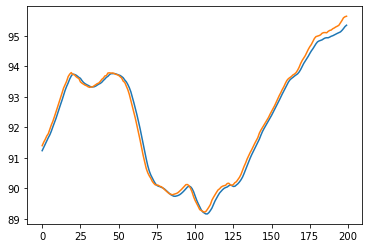

In [17]:
# just the training
plt.plot(train_results['Train_Predictions'][:200])
plt.plot(train_results['Actuals'][:200])

16/16 [==============================] - 0s 1ms/step


,Val_Predictions,Actuals
0,95.132797,95.3354
1,95.128273,95.3287
2,95.125664,95.3083
3,95.113464,95.3333
4,95.121185,95.3454
...,...,...
495,90.801872,91.0012
496,90.919930,91.1050
497,91.031288,91.2146
498,91.142937,91.3029


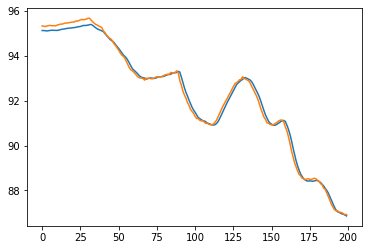

In [18]:
# how about validation
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val_Predictions':val_predictions, 'Actuals':y_val})
display(val_results)

plt.plot(val_results['Val_Predictions'][:200])
plt.plot(val_results['Actuals'][:200])

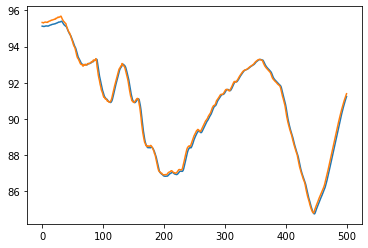

In [19]:
plt.plot(val_results['Val_Predictions'])
plt.plot(val_results['Actuals'])

### Results of single variable model

16/16 [==============================] - 0s 1ms/step


,Test_Predictions,Actuals
0,91.341133,91.4921
1,91.438438,91.5775
2,91.530144,91.6546
3,91.614006,91.7333
4,91.695107,91.7912
...,...,...
495,79.364670,79.4696
496,79.464905,80.0721
497,79.794434,80.4046
498,80.122688,80.6565


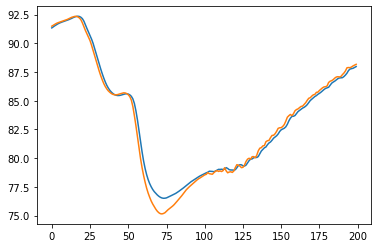

In [20]:
# how about test
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test_Predictions':test_predictions, 'Actuals':y_test})
display(test_results)

plt.plot(test_results['Test_Predictions'][:200])
plt.plot(test_results['Actuals'][:200])

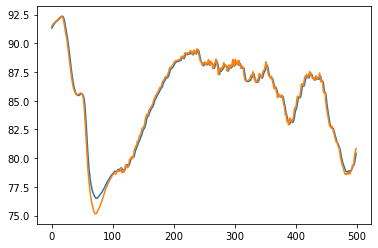

In [21]:
plt.plot(test_results['Test_Predictions'])
plt.plot(test_results['Actuals'])

#### A prettier graph for single variable results:

In [22]:
test_results['date'] = date_rng = pd.date_range(start='2017-01-23', end='2018-06-06', freq='D')
# last 500 days from the df
test_results

,Test_Predictions,Actuals,date
0,91.341133,91.4921,2017-01-23
1,91.438438,91.5775,2017-01-24
2,91.530144,91.6546,2017-01-25
3,91.614006,91.7333,2017-01-26
4,91.695107,91.7912,2017-01-27
...,...,...,...
495,79.364670,79.4696,2018-06-02
496,79.464905,80.0721,2018-06-03
497,79.794434,80.4046,2018-06-04
498,80.122688,80.6565,2018-06-05


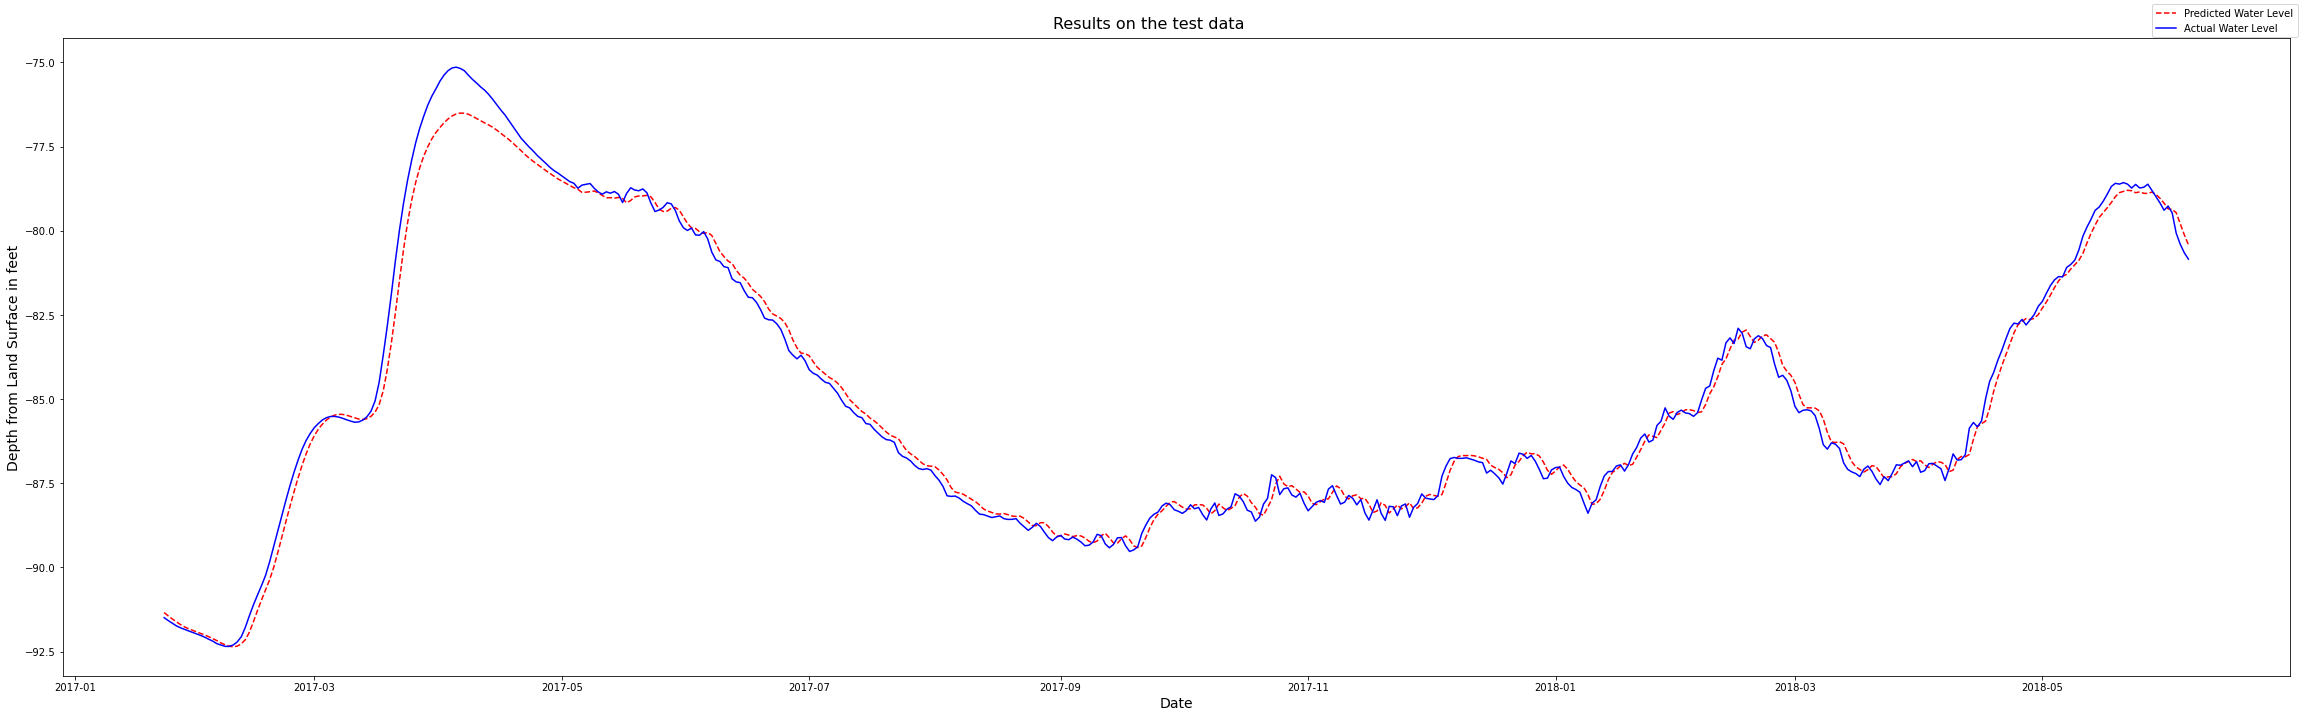

In [23]:
y = test_results.date.values
X = test_results.Test_Predictions.values*-1
X1 = test_results.Actuals.values*-1


fig, ax1 = plt.subplots(figsize=(32, 10)) #big for copy paste reasons
plt.suptitle('Results on the test data', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'r--', label = 'Predicted Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = plt.subplot()
ax2.plot(y,X1, 'b-', label = 'Actual Water Level')

fig.legend()

fig.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y):
    predictions = model.predict(X).flatten()
    df_plot = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    
    Pred = df_plot.Predictions.values*-1
    Act = df_plot.Actuals.values*-1
    
    fig, ax1 = plt.subplots(figsize=(16, 5)) 
    plt.suptitle('Prediction', fontsize=16)

    ax1 = plt.subplot()
    plt.plot(Pred, 'r--', label = 'Predicted Water Level')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Depth from Land Surface in feet', fontsize=14)

    ax2 = plt.subplot()
    ax2.plot(Act, 'b-', label = 'Actual Water Level')

    fig.legend()

    fig.tight_layout()
    plt.show()
    
    return df_plot, mse(y, predictions)

16/16 [==============================] - 0s 1ms/step


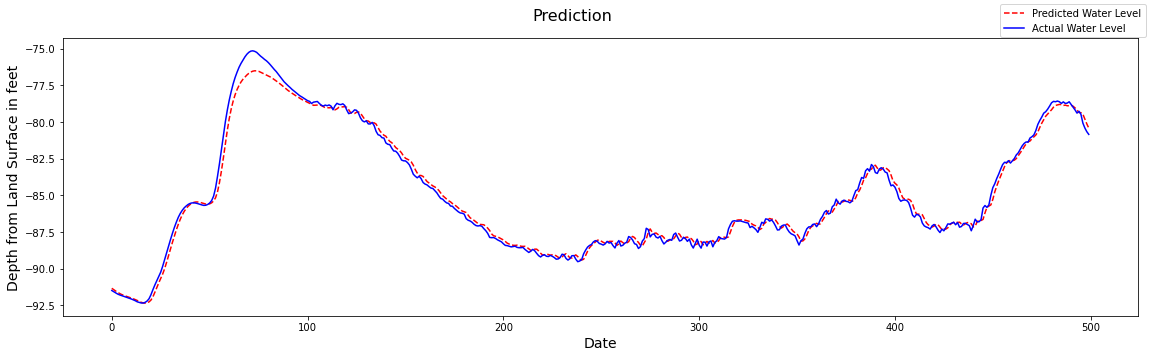

(     Predictions  Actuals
 0      91.341133  91.4921
 1      91.438438  91.5775
 2      91.530144  91.6546
 3      91.614006  91.7333
 4      91.695107  91.7912
 ..           ...      ...
 495    79.364670  79.4696
 496    79.464905  80.0721
 497    79.794434  80.4046
 498    80.122688  80.6565
 499    80.415703  80.8423
 
 [500 rows x 2 columns],
 0.16944805108720068)

In [25]:
plot_predictions1(model1, X_test, y_test)

## A convolutional NN model!

In [26]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
cp2 = ModelCheckpoint('meremodel2/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [28]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp2])

Epoch 1/50
100/110 [==========================>...] - ETA: 0s - loss: 8165.4287 - root_mean_squared_error: 90.3628INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 5ms/step - loss: 8170.4844 - root_mean_squared_error: 90.3907 - val_loss: 8213.9941 - val_root_mean_squared_error: 90.6311
Epoch 2/50
 55/110 [==============>...............] - ETA: 0s - loss: 8161.1274 - root_mean_squared_error: 90.3390INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8147.3149 - root_mean_squared_error: 90.2625 - val_loss: 8194.0986 - val_root_mean_squared_error: 90.5213
Epoch 3/50
 56/110 [==============>...............] - ETA: 0s - loss: 8131.3555 - root_mean_squared_error: 90.1740INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 5ms/step - loss: 8127.5093 - root_mean_squared_error: 90.1527 - val_loss: 8174.2319 - val_root_mean_squared_error: 90.4115
Epoch 4/50
110/110 [==============================] - ETA: 0s - loss: 8107.7305 - root_mean_squared_error: 90.0429INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8107.7305 - root_mean_squared_error: 90.0429 - val_loss: 8154.4019 - val_root_mean_squared_error: 90.3017
Epoch 5/50
 56/110 [==============>...............] - ETA: 0s - loss: 8105.2412 - root_mean_squared_error: 90.0291INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8087.9946 - root_mean_squared_error: 89.9333 - val_loss: 8134.6060 - val_root_mean_squared_error: 90.1920
Epoch 6/50
109/110 [============================>.] - ETA: 0s - loss: 8067.5073 - root_mean_squared_error: 89.8193INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8068.2905 - root_mean_squared_error: 89.8237 - val_loss: 8114.8452 - val_root_mean_squared_error: 90.0824
Epoch 7/50
 56/110 [==============>...............] - ETA: 0s - loss: 8044.8701 - root_mean_squared_error: 89.6932INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8048.6167 - root_mean_squared_error: 89.7141 - val_loss: 8095.1167 - val_root_mean_squared_error: 89.9729
Epoch 8/50
108/110 [============================>.] - ETA: 0s - loss: 8030.6978 - root_mean_squared_error: 89.6142INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8028.9854 - root_mean_squared_error: 89.6046 - val_loss: 8075.4214 - val_root_mean_squared_error: 89.8633
Epoch 9/50
 56/110 [==============>...............] - ETA: 0s - loss: 8006.3433 - root_mean_squared_error: 89.4782INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 8009.3809 - root_mean_squared_error: 89.4951 - val_loss: 8055.7573 - val_root_mean_squared_error: 89.7539
Epoch 10/50
 57/110 [==============>...............] - ETA: 0s - loss: 7977.3457 - root_mean_squared_error: 89.3160INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7989.8022 - root_mean_squared_error: 89.3857 - val_loss: 8036.1323 - val_root_mean_squared_error: 89.6445
Epoch 11/50
106/110 [===========================>..] - ETA: 0s - loss: 7965.9507 - root_mean_squared_error: 89.2522INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7970.2622 - root_mean_squared_error: 89.2763 - val_loss: 8016.5298 - val_root_mean_squared_error: 89.5351
Epoch 12/50
 57/110 [==============>...............] - ETA: 0s - loss: 7943.2109 - root_mean_squared_error: 89.1247INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7950.7534 - root_mean_squared_error: 89.1670 - val_loss: 7996.9595 - val_root_mean_squared_error: 89.4257
Epoch 13/50
110/110 [==============================] - ETA: 0s - loss: 7931.2754 - root_mean_squared_error: 89.0577INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7931.2754 - root_mean_squared_error: 89.0577 - val_loss: 7977.4180 - val_root_mean_squared_error: 89.3164
Epoch 14/50
110/110 [==============================] - ETA: 0s - loss: 7911.8257 - root_mean_squared_error: 88.9484INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7911.8257 - root_mean_squared_error: 88.9484 - val_loss: 7957.9219 - val_root_mean_squared_error: 89.2072
Epoch 15/50
103/110 [===========================>..] - ETA: 0s - loss: 7893.5518 - root_mean_squared_error: 88.8457INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7892.4136 - root_mean_squared_error: 88.8393 - val_loss: 7938.4424 - val_root_mean_squared_error: 89.0979
Epoch 16/50
104/110 [===========================>..] - ETA: 0s - loss: 7873.9253 - root_mean_squared_error: 88.7351INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7873.0234 - root_mean_squared_error: 88.7301 - val_loss: 7918.9961 - val_root_mean_squared_error: 88.9887
Epoch 17/50
 55/110 [==============>...............] - ETA: 0s - loss: 7845.1675 - root_mean_squared_error: 88.5730INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 5ms/step - loss: 7853.6646 - root_mean_squared_error: 88.6209 - val_loss: 7899.5811 - val_root_mean_squared_error: 88.8796
Epoch 18/50
108/110 [============================>.] - ETA: 0s - loss: 7835.2896 - root_mean_squared_error: 88.5172INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7834.3345 - root_mean_squared_error: 88.5118 - val_loss: 7880.1865 - val_root_mean_squared_error: 88.7704
Epoch 19/50
 56/110 [==============>...............] - ETA: 0s - loss: 7813.9478 - root_mean_squared_error: 88.3965INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7815.0366 - root_mean_squared_error: 88.4027 - val_loss: 7860.8291 - val_root_mean_squared_error: 88.6613
Epoch 20/50
109/110 [============================>.] - ETA: 0s - loss: 7795.3491 - root_mean_squared_error: 88.2913INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7795.7681 - root_mean_squared_error: 88.2936 - val_loss: 7841.4995 - val_root_mean_squared_error: 88.5522
Epoch 21/50
 56/110 [==============>...............] - ETA: 0s - loss: 7769.0103 - root_mean_squared_error: 88.1420INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7776.5244 - root_mean_squared_error: 88.1846 - val_loss: 7822.2026 - val_root_mean_squared_error: 88.4432
Epoch 22/50
109/110 [============================>.] - ETA: 0s - loss: 7757.5303 - root_mean_squared_error: 88.0768INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7757.3105 - root_mean_squared_error: 88.0756 - val_loss: 7802.9292 - val_root_mean_squared_error: 88.3342
Epoch 23/50
 56/110 [==============>...............] - ETA: 0s - loss: 7741.2227 - root_mean_squared_error: 87.9842INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7738.1304 - root_mean_squared_error: 87.9666 - val_loss: 7783.6846 - val_root_mean_squared_error: 88.2252
Epoch 24/50
110/110 [==============================] - ETA: 0s - loss: 7718.9712 - root_mean_squared_error: 87.8577INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7718.9712 - root_mean_squared_error: 87.8577 - val_loss: 7764.4658 - val_root_mean_squared_error: 88.1162
Epoch 25/50
109/110 [============================>.] - ETA: 0s - loss: 7699.2397 - root_mean_squared_error: 87.7453INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7699.8423 - root_mean_squared_error: 87.7487 - val_loss: 7745.2822 - val_root_mean_squared_error: 88.0073
Epoch 26/50
108/110 [============================>.] - ETA: 0s - loss: 7682.8657 - root_mean_squared_error: 87.6520INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7680.7417 - root_mean_squared_error: 87.6398 - val_loss: 7726.1138 - val_root_mean_squared_error: 87.8983
Epoch 27/50
110/110 [==============================] - ETA: 0s - loss: 7661.6646 - root_mean_squared_error: 87.5309INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7661.6646 - root_mean_squared_error: 87.5309 - val_loss: 7706.9834 - val_root_mean_squared_error: 87.7894
Epoch 28/50
 57/110 [==============>...............] - ETA: 0s - loss: 7649.2085 - root_mean_squared_error: 87.4598INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7642.6152 - root_mean_squared_error: 87.4221 - val_loss: 7687.8662 - val_root_mean_squared_error: 87.6805
Epoch 29/50
 57/110 [==============>...............] - ETA: 0s - loss: 7645.7827 - root_mean_squared_error: 87.4402INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7623.5952 - root_mean_squared_error: 87.3132 - val_loss: 7668.7861 - val_root_mean_squared_error: 87.5716
Epoch 30/50
 57/110 [==============>...............] - ETA: 0s - loss: 7611.5806 - root_mean_squared_error: 87.2444INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7604.5962 - root_mean_squared_error: 87.2043 - val_loss: 7649.7300 - val_root_mean_squared_error: 87.4627
Epoch 31/50
109/110 [============================>.] - ETA: 0s - loss: 7585.6855 - root_mean_squared_error: 87.0958INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7585.6240 - root_mean_squared_error: 87.0955 - val_loss: 7630.7007 - val_root_mean_squared_error: 87.3539
Epoch 32/50
105/110 [===========================>..] - ETA: 0s - loss: 7569.8228 - root_mean_squared_error: 87.0047INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 5ms/step - loss: 7566.6836 - root_mean_squared_error: 86.9867 - val_loss: 7611.6924 - val_root_mean_squared_error: 87.2450
Epoch 33/50
 57/110 [==============>...............] - ETA: 0s - loss: 7548.1021 - root_mean_squared_error: 86.8798INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7547.7646 - root_mean_squared_error: 86.8779 - val_loss: 7592.7212 - val_root_mean_squared_error: 87.1362
Epoch 34/50
 58/110 [==============>...............] - ETA: 0s - loss: 7513.9888 - root_mean_squared_error: 86.6833INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7528.8730 - root_mean_squared_error: 86.7691 - val_loss: 7573.7661 - val_root_mean_squared_error: 87.0274
Epoch 35/50
 55/110 [==============>...............] - ETA: 0s - loss: 7541.1084 - root_mean_squared_error: 86.8396INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7510.0107 - root_mean_squared_error: 86.6603 - val_loss: 7554.8350 - val_root_mean_squared_error: 86.9186
Epoch 36/50
 57/110 [==============>...............] - ETA: 0s - loss: 7491.5366 - root_mean_squared_error: 86.5537INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7491.1694 - root_mean_squared_error: 86.5515 - val_loss: 7535.9360 - val_root_mean_squared_error: 86.8098
Epoch 37/50
110/110 [==============================] - ETA: 0s - loss: 7472.3516 - root_mean_squared_error: 86.4428INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7472.3516 - root_mean_squared_error: 86.4428 - val_loss: 7517.0620 - val_root_mean_squared_error: 86.7010
Epoch 38/50
 57/110 [==============>...............] - ETA: 0s - loss: 7481.1304 - root_mean_squared_error: 86.4935INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7453.5605 - root_mean_squared_error: 86.3340 - val_loss: 7498.2051 - val_root_mean_squared_error: 86.5922
Epoch 39/50
 57/110 [==============>...............] - ETA: 0s - loss: 7440.4644 - root_mean_squared_error: 86.2581INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7434.7964 - root_mean_squared_error: 86.2253 - val_loss: 7479.3828 - val_root_mean_squared_error: 86.4834
Epoch 40/50
 57/110 [==============>...............] - ETA: 0s - loss: 7416.3330 - root_mean_squared_error: 86.1181INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7416.0571 - root_mean_squared_error: 86.1165 - val_loss: 7460.5864 - val_root_mean_squared_error: 86.3747
Epoch 41/50
 55/110 [==============>...............] - ETA: 0s - loss: 7395.8574 - root_mean_squared_error: 85.9992INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7397.3408 - root_mean_squared_error: 86.0078 - val_loss: 7441.8052 - val_root_mean_squared_error: 86.2659
Epoch 42/50
 55/110 [==============>...............] - ETA: 0s - loss: 7389.5522 - root_mean_squared_error: 85.9625INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7378.6489 - root_mean_squared_error: 85.8991 - val_loss: 7423.0586 - val_root_mean_squared_error: 86.1572
Epoch 43/50
108/110 [============================>.] - ETA: 0s - loss: 7358.7520 - root_mean_squared_error: 85.7832INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7359.9839 - root_mean_squared_error: 85.7904 - val_loss: 7404.3301 - val_root_mean_squared_error: 86.0484
Epoch 44/50
108/110 [============================>.] - ETA: 0s - loss: 7342.0630 - root_mean_squared_error: 85.6858INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7341.3477 - root_mean_squared_error: 85.6817 - val_loss: 7385.6260 - val_root_mean_squared_error: 85.9397
Epoch 45/50
110/110 [==============================] - ETA: 0s - loss: 7322.7305 - root_mean_squared_error: 85.5730INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7322.7305 - root_mean_squared_error: 85.5730 - val_loss: 7366.9517 - val_root_mean_squared_error: 85.8309
Epoch 46/50
110/110 [==============================] - ETA: 0s - loss: 7304.1357 - root_mean_squared_error: 85.4642INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7304.1357 - root_mean_squared_error: 85.4642 - val_loss: 7348.2930 - val_root_mean_squared_error: 85.7222
Epoch 47/50
 55/110 [==============>...............] - ETA: 0s - loss: 7299.9365 - root_mean_squared_error: 85.4397INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 5ms/step - loss: 7285.5684 - root_mean_squared_error: 85.3555 - val_loss: 7329.6685 - val_root_mean_squared_error: 85.6135
Epoch 48/50
110/110 [==============================] - ETA: 0s - loss: 7267.0288 - root_mean_squared_error: 85.2469INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7267.0288 - root_mean_squared_error: 85.2469 - val_loss: 7311.0640 - val_root_mean_squared_error: 85.5048
Epoch 49/50
 57/110 [==============>...............] - ETA: 0s - loss: 7237.4028 - root_mean_squared_error: 85.0729INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7248.5117 - root_mean_squared_error: 85.1382 - val_loss: 7292.4878 - val_root_mean_squared_error: 85.3961
Epoch 50/50
 56/110 [==============>...............] - ETA: 0s - loss: 7233.1592 - root_mean_squared_error: 85.0480INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 7230.0205 - root_mean_squared_error: 85.0295 - val_loss: 7273.9341 - val_root_mean_squared_error: 85.2874


16/16 [==============================] - 0s 827us/step


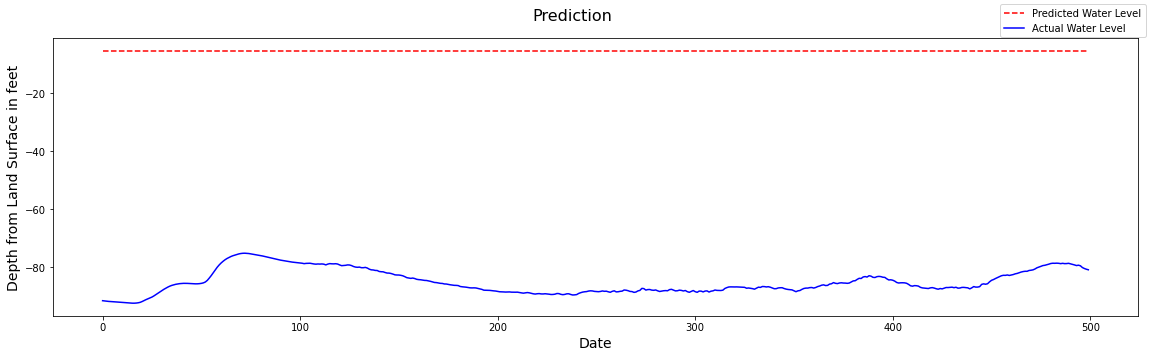

(     Predictions  Actuals
 0       5.456367  91.4921
 1       5.456367  91.5775
 2       5.456367  91.6546
 3       5.456367  91.7333
 4       5.456367  91.7912
 ..           ...      ...
 495     5.456367  79.4696
 496     5.456367  80.0721
 497     5.456367  80.4046
 498     5.456367  80.6565
 499     5.456367  80.8423
 
 [500 rows x 2 columns],
 6339.52676698675)

In [29]:
model2 = load_model('meremodel2/')
plot_predictions1(model2, X_test, y_test)

## GRU Model

In [30]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
cp3 = ModelCheckpoint('meremodel3/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [32]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp3])

Epoch 1/50
 95/110 [========================>.....] - ETA: 0s - loss: 6693.8940 - root_mean_squared_error: 81.8162INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 3s 19ms/step - loss: 6516.8765 - root_mean_squared_error: 80.7272 - val_loss: 5176.0034 - val_root_mean_squared_error: 71.9445
Epoch 2/50
 99/110 [==========================>...] - ETA: 0s - loss: 3668.8965 - root_mean_squared_error: 60.5714INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 3526.0020 - root_mean_squared_error: 59.3801 - val_loss: 2022.4973 - val_root_mean_squared_error: 44.9722
Epoch 3/50
 96/110 [=========================>....] - ETA: 0s - loss: 1154.2699 - root_mean_squared_error: 33.9745INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 1069.1213 - root_mean_squared_error: 32.6974 - val_loss: 409.2879 - val_root_mean_squared_error: 20.2309
Epoch 4/50
109/110 [============================>.] - ETA: 0s - loss: 165.9508 - root_mean_squared_error: 12.8822INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 165.5795 - root_mean_squared_error: 12.8678 - val_loss: 41.9264 - val_root_mean_squared_error: 6.4751
Epoch 5/50
 99/110 [==========================>...] - ETA: 0s - loss: 22.2311 - root_mean_squared_error: 4.7150INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 21.3659 - root_mean_squared_error: 4.6223 - val_loss: 9.5007 - val_root_mean_squared_error: 3.0823
Epoch 6/50
 96/110 [=========================>....] - ETA: 0s - loss: 12.4990 - root_mean_squared_error: 3.5354INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 12.3238 - root_mean_squared_error: 3.5105 - val_loss: 7.9241 - val_root_mean_squared_error: 2.8150
Epoch 7/50
 97/110 [=========================>....] - ETA: 0s - loss: 11.8589 - root_mean_squared_error: 3.4437INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 12.0989 - root_mean_squared_error: 3.4783 - val_loss: 7.8279 - val_root_mean_squared_error: 2.7978
Epoch 8/50
 98/110 [=========================>....] - ETA: 0s - loss: 9.7393 - root_mean_squared_error: 3.1208 INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 9.3540 - root_mean_squared_error: 3.0584 - val_loss: 4.8407 - val_root_mean_squared_error: 2.2002
Epoch 9/50
 98/110 [=========================>....] - ETA: 0s - loss: 3.9456 - root_mean_squared_error: 1.9864INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 3.7204 - root_mean_squared_error: 1.9288 - val_loss: 1.3315 - val_root_mean_squared_error: 1.1539
Epoch 10/50
 96/110 [=========================>....] - ETA: 0s - loss: 1.1641 - root_mean_squared_error: 1.0789INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 1.1095 - root_mean_squared_error: 1.0533 - val_loss: 0.5354 - val_root_mean_squared_error: 0.7317
Epoch 11/50
 95/110 [========================>.....] - ETA: 0s - loss: 0.3974 - root_mean_squared_error: 0.6304INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 0.3765 - root_mean_squared_error: 0.6136 - val_loss: 0.2546 - val_root_mean_squared_error: 0.5046
Epoch 12/50
110/110 [==============================] - 0s 3ms/step - loss: 0.2235 - root_mean_squared_error: 0.4728 - val_loss: 0.2584 - val_root_mean_squared_error: 0.5083
Epoch 13/50
 95/110 [========================>.....] - ETA: 0s - loss: 0.1532 - root_mean_squared_error: 0.3914INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.1485 - root_mean_squared_error: 0.3854 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3508
Epoch 14/50
 98/110 [=========================>....] - ETA: 0s - loss: 0.1415 - root_mean_squared_error: 0.3761INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 0.1380 - root_mean_squared_error: 0.3715 - val_loss: 0.1150 - val_root_mean_squared_error: 0.3391
Epoch 15/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1224 - root_mean_squared_error: 0.3499 - val_loss: 0.1499 - val_root_mean_squared_error: 0.3872
Epoch 16/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1205 - root_mean_squared_error: 0.3471 - val_loss: 0.1183 - val_root_mean_squared_error: 0.3439
Epoch 17/50
 96/110 [=========================>....] - ETA: 0s - loss: 0.1051 - root_mean_squared_error: 0.3242INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 0.1044 - root_mean_squared_error: 0.3231 - val_loss: 0.1071 - val_root_mean_squared_error: 0.3273
Epoch 18/50
 97/110 [=========================>....] - ETA: 0s - loss: 0.0982 - root_mean_squared_error: 0.3134INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 0.0964 - root_mean_squared_error: 0.3105 - val_loss: 0.0596 - val_root_mean_squared_error: 0.2441
Epoch 19/50
 97/110 [=========================>....] - ETA: 0s - loss: 0.0888 - root_mean_squared_error: 0.2981INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0850 - root_mean_squared_error: 0.2916 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2020
Epoch 20/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0869 - root_mean_squared_error: 0.2949 - val_loss: 0.1815 - val_root_mean_squared_error: 0.4260
Epoch 21/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0755 - root_mean_squared_error: 0.2747 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2167
Epoch 22/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2120
Epoch 23/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0944 - root_mean_squared_error: 0.3072 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3740
Epoch 24/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0766 - root_mean_squared_error: 0.2768 - val_loss: 0.0563 - val_root_

INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 0.0797 - root_mean_squared_error: 0.2823 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2001
Epoch 31/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0853 - root_mean_squared_error: 0.2921 - val_loss: 0.0491 - val_root_mean_squared_error: 0.2217
Epoch 32/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0711 - root_mean_squared_error: 0.2667 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2024
Epoch 33/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0832 - root_mean_squared_error: 0.2885 - val_loss: 0.0837 - val_root_mean_squared_error: 0.2894
Epoch 34/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0770 - root_mean_squared_error: 0.2775 - val_loss: 0.0528 - val_root_mean_squared_error: 0.2299
Epoch 35/50
 96/110 [=========================>....] - ETA: 0s - loss: 0.0639 - root_mean_squared_error: 0.2529INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0635 - root_mean_squared_error: 0.2520 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1974
Epoch 36/50
 93/110 [========================>.....] - ETA: 0s - loss: 0.0697 - root_mean_squared_error: 0.2640INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0710 - root_mean_squared_error: 0.2664 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 37/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0662 - root_mean_squared_error: 0.2573 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1950
Epoch 38/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0597 - root_mean_squared_error: 0.2444 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 39/50
 98/110 [=========================>....] - ETA: 0s - loss: 0.0607 - root_mean_squared_error: 0.2464INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 16ms/step - loss: 0.0621 - root_mean_squared_error: 0.2492 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 40/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0695 - root_mean_squared_error: 0.2637 - val_loss: 0.1016 - val_root_mean_squared_error: 0.3188
Epoch 41/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0568 - root_mean_squared_error: 0.2383 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2188
Epoch 42/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0605 - root_mean_squared_error: 0.2460 - val_loss: 0.0565 - val_root_mean_squared_error: 0.2377
Epoch 43/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0553 - root_mean_squared_error: 0.2352 - val_loss: 0.1048 - val_root_mean_squared_error: 0.3237
Epoch 44/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0625 - root_mean_squared_error: 0.2501 - val_loss: 0.0436 - val_root_

16/16 [==============================] - 0s 1ms/step


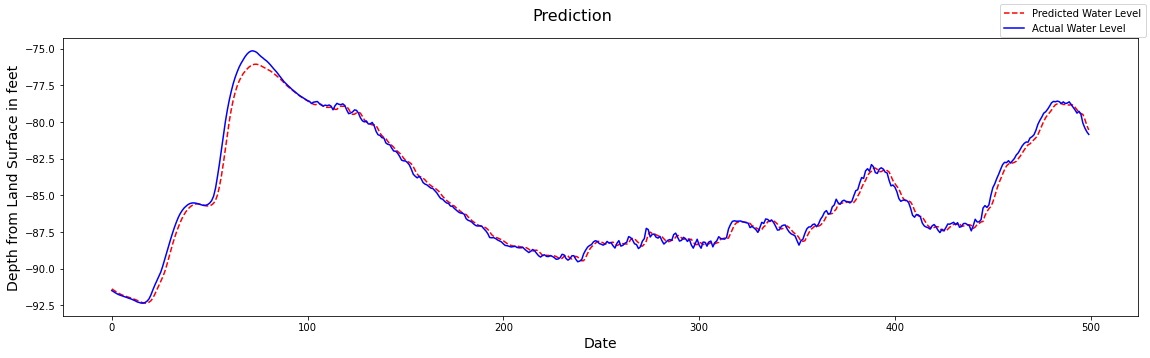

(     Predictions  Actuals
 0      91.376183  91.4921
 1      91.466194  91.5775
 2      91.552818  91.6546
 3      91.632378  91.7333
 4      91.707375  91.7912
 ..           ...      ...
 495    79.413773  79.4696
 496    79.478348  80.0721
 497    79.811234  80.4046
 498    80.221191  80.6565
 499    80.541809  80.8423
 
 [500 rows x 2 columns],
 0.15978925470413202)

In [33]:
model3 = load_model('meremodel3/')
plot_predictions1(model3, X_test, y_test)

## Multivariate tutorial

both of these tutorials skip basically all explanation; I need to go through Marcos' notebooks and whatnot, but below is following the second one listed above. [This one](https://www.youtube.com/watch?v=kGdbPnMCdOg) starting around 17 minutes in (the first 17 minutes are doing the CNN and GRU above)

In [34]:
# recall the average well measurements are stored in well
well

date
2006-02-07    91.0100
2006-02-08    91.0429
2006-02-09    91.1096
2006-02-10    91.1954
2006-02-11    91.3012
               ...   
2018-06-02    79.4696
2018-06-03    80.0721
2018-06-04    80.4046
2018-06-05    80.6565
2018-06-06    80.8423
Name: avg_well_depth, Length: 4503, dtype: float64

In [35]:
well_df = pd.DataFrame({'avg_well_depth':well})
well_df['Seconds'] = well_df.index.map(pd.Timestamp.timestamp)
well_df

,avg_well_depth,Seconds
date,,
2006-02-07,91.0100,1.139270e+09
2006-02-08,91.0429,1.139357e+09
2006-02-09,91.1096,1.139443e+09
2006-02-10,91.1954,1.139530e+09
2006-02-11,91.3012,1.139616e+09
...,...,...
2018-06-02,79.4696,1.527898e+09
2018-06-03,80.0721,1.527984e+09
2018-06-04,80.4046,1.528070e+09


In [36]:
day = 60*60*24
year = 365.2425*day

well_df['Year sin'] = np.sin(well_df['Seconds'] * (2 * np.pi / year))
well_df['Year cos'] = np.cos(well_df['Seconds'] * (2 * np.pi / year))

well_df = well_df.drop('Seconds', axis=1)
well_df.head()

,avg_well_depth,Year sin,Year cos
date,,,
2006-02-07,91.0100,0.598115,0.801410
2006-02-08,91.0429,0.611813,0.791003
2006-02-09,91.1096,0.625329,0.780361
2006-02-10,91.1954,0.638660,0.769489
2006-02-11,91.3012,0.651802,0.758389


In [37]:
well_df['gage_ht'] = df.gage_ht.values
well_df['prcp'] = df.prcp.values
well_df.head()

,avg_well_depth,Year sin,Year cos,gage_ht,prcp
date,,,,,
2006-02-07,91.0100,0.598115,0.801410,21.65,0.0
2006-02-08,91.0429,0.611813,0.791003,21.64,0.0
2006-02-09,91.1096,0.625329,0.780361,21.58,0.0
2006-02-10,91.1954,0.638660,0.769489,21.46,0.0
2006-02-11,91.3012,0.651802,0.758389,21.36,0.0


In [38]:
def df_to_X_y_multi(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [50]:
X2, y2 = df_to_X_y_multi(well_df)
X2.shape, y2.shape

((4497, 6, 5), (4497,))

### Train Test Split

In [52]:
X2_train, y2_train = X2[:3497], y2[:3497]
X2_val, y2_val = X2[3497:3997], y2[3497:3997]
X2_test, y2_test = X2[3997:], y2[3997:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((3497, 6, 5), (3497,), (500, 6, 5), (500,), (500, 6, 5), (500,))

### Scaling
35 minutes in

In [41]:
well_training_mean = np.mean(X2_train[:, :, 0])
well_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - well_training_mean) / well_training_std
    return X

In [42]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.54167390e-01,  2.81741935e-01,  9.59490220e-01,
          1.88700000e+01,  2.40000000e-01],
        [ 1.85938003e-01,  2.98205330e-01,  9.54501745e-01,
          1.88900000e+01,  4.10000000e-01],
        [ 2.15809287e-01,  3.14580477e-01,  9.49230806e-01,
          1.88600000e+01,  0.00000000e+00],
        [ 2.47349679e-01,  3.30862531e-01,  9.43678963e-01,
          1.88700000e+01,  0.00000000e+00],
        [ 2.72760415e-01,  3.47046673e-01,  9.37847859e-01,
          1.88900000e+01,  3.00000000e-02],
        [ 3.00358258e-01,  3.63128115e-01,  9.31739219e-01,
          1.88900000e+01,  2.00000000e-01]],

       [[ 1.85938003e-01,  2.98205330e-01,  9.54501745e-01,
          1.88900000e+01,  4.10000000e-01],
        [ 2.15809287e-01,  3.14580477e-01,  9.49230806e-01,
          1.88600000e+01,  0.00000000e+00],
        [ 2.47349679e-01,  3.30862531e-01,  9.43678963e-01,
          1.88700000e+01,  0.00000000e+00],
        [ 2.72760415e-01,  3.47046673e-01,  9.37847859e-01,
  

In [43]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Flatten())
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
cp4 = ModelCheckpoint('meremodel4/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [45]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=50, callbacks=[cp4])

Epoch 1/50
109/110 [============================>.] - ETA: 0s - loss: 6144.4336 - root_mean_squared_error: 78.3864INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 4s 23ms/step - loss: 6138.4360 - root_mean_squared_error: 78.3482 - val_loss: 3808.0078 - val_root_mean_squared_error: 61.7091
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 2060.0840 - root_mean_squared_error: 45.3881INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 2060.0840 - root_mean_squared_error: 45.3881 - val_loss: 795.2999 - val_root_mean_squared_error: 28.2011
Epoch 3/50
 91/110 [=======================>......] - ETA: 0s - loss: 348.1722 - root_mean_squared_error: 18.6594INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 303.2771 - root_mean_squared_error: 17.4149 - val_loss: 59.0394 - val_root_mean_squared_error: 7.6837
Epoch 4/50
 90/110 [=======================>......] - ETA: 0s - loss: 26.9022 - root_mean_squared_error: 5.1867INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 24.3987 - root_mean_squared_error: 4.9395 - val_loss: 9.1828 - val_root_mean_squared_error: 3.0303
Epoch 5/50
 92/110 [========================>.....] - ETA: 0s - loss: 12.2970 - root_mean_squared_error: 3.5067INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.2765 - root_mean_squared_error: 3.5038 - val_loss: 7.9005 - val_root_mean_squared_error: 2.8108
Epoch 6/50
 93/110 [========================>.....] - ETA: 0s - loss: 11.9625 - root_mean_squared_error: 3.4587INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.1026 - root_mean_squared_error: 3.4789 - val_loss: 7.8827 - val_root_mean_squared_error: 2.8076
Epoch 7/50
 92/110 [========================>.....] - ETA: 0s - loss: 11.9700 - root_mean_squared_error: 3.4598INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.1024 - root_mean_squared_error: 3.4788 - val_loss: 7.8649 - val_root_mean_squared_error: 2.8045
Epoch 8/50
 91/110 [=======================>......] - ETA: 0s - loss: 12.1889 - root_mean_squared_error: 3.4913INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 12.0917 - root_mean_squared_error: 3.4773 - val_loss: 7.8364 - val_root_mean_squared_error: 2.7994
Epoch 9/50
 93/110 [========================>.....] - ETA: 0s - loss: 11.9840 - root_mean_squared_error: 3.4618INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.0881 - root_mean_squared_error: 3.4768 - val_loss: 7.8093 - val_root_mean_squared_error: 2.7945
Epoch 10/50
110/110 [==============================] - 0s 2ms/step - loss: 12.0880 - root_mean_squared_error: 3.4768 - val_loss: 7.8965 - val_root_mean_squared_error: 2.8101
Epoch 11/50
 92/110 [========================>.....] - ETA: 0s - loss: 12.2744 - root_mean_squared_error: 3.5035INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.0875 - root_mean_squared_error: 3.4767 - val_loss: 7.8073 - val_root_mean_squared_error: 2.7942
Epoch 12/50
 91/110 [=======================>......] - ETA: 0s - loss: 12.1174 - root_mean_squared_error: 3.4810INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 11.9013 - root_mean_squared_error: 3.4498 - val_loss: 5.1146 - val_root_mean_squared_error: 2.2615
Epoch 13/50
 92/110 [========================>.....] - ETA: 0s - loss: 6.6302 - root_mean_squared_error: 2.5749INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 6.3208 - root_mean_squared_error: 2.5141 - val_loss: 2.2186 - val_root_mean_squared_error: 1.4895
Epoch 14/50
 92/110 [========================>.....] - ETA: 0s - loss: 3.2683 - root_mean_squared_error: 1.8079INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 3.1376 - root_mean_squared_error: 1.7713 - val_loss: 0.6370 - val_root_mean_squared_error: 0.7981
Epoch 15/50
 93/110 [========================>.....] - ETA: 0s - loss: 1.1051 - root_mean_squared_error: 1.0512INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.9975 - root_mean_squared_error: 0.9987 - val_loss: 0.2630 - val_root_mean_squared_error: 0.5128
Epoch 16/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.2531 - root_mean_squared_error: 0.5030INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 0.2322 - root_mean_squared_error: 0.4818 - val_loss: 0.1496 - val_root_mean_squared_error: 0.3868
Epoch 17/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.1054 - root_mean_squared_error: 0.3247INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1059 - root_mean_squared_error: 0.3255 - val_loss: 0.0613 - val_root_mean_squared_error: 0.2475
Epoch 18/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0786 - root_mean_squared_error: 0.2803INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0787 - root_mean_squared_error: 0.2806 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2251
Epoch 19/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0778 - root_mean_squared_error: 0.2789 - val_loss: 0.0515 - val_root_mean_squared_error: 0.2269
Epoch 20/50
 93/110 [========================>.....] - ETA: 0s - loss: 0.0669 - root_mean_squared_error: 0.2586INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0668 - root_mean_squared_error: 0.2585 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2125
Epoch 21/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0593 - root_mean_squared_error: 0.2435 - val_loss: 0.0481 - val_root_mean_squared_error: 0.2192
Epoch 22/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0593 - root_mean_squared_error: 0.2434INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0583 - root_mean_squared_error: 0.2415 - val_loss: 0.0386 - val_root_mean_squared_error: 0.1965
Epoch 23/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0562 - root_mean_squared_error: 0.2370 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2001
Epoch 24/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0566 - root_mean_squared_error: 0.2380 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2045
Epoch 25/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0508 - root_mean_squared_error: 0.2253 - val_loss: 0.0428 - val_root_mean_squared_error: 0.2068
Epoch 26/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0528 - root_mean_squared_error: 0.2297 - val_loss: 0.0643 - val_root_mean_squared_error: 0.2535
Epoch 27/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - val_loss: 0.0675 - val_root_

INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0417 - root_mean_squared_error: 0.2041 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1786
Epoch 29/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0403 - root_mean_squared_error: 0.2006 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 30/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0370 - root_mean_squared_error: 0.1922 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1880
Epoch 31/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1914INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1721
Epoch 32/50
 95/110 [========================>.....] - ETA: 0s - loss: 0.0324 - root_mean_squared_error: 0.1800INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 0.0323 - root_mean_squared_error: 0.1798 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 33/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0340 - root_mean_squared_error: 0.1845 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1994
Epoch 34/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0307 - root_mean_squared_error: 0.1751 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1749
Epoch 35/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1605INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1465
Epoch 36/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.0275 - root_mean_squared_error: 0.1659INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0272 - root_mean_squared_error: 0.1648 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 37/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0298 - root_mean_squared_error: 0.1725 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1679
Epoch 38/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1623
Epoch 39/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.0229 - root_mean_squared_error: 0.1513INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 40/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0228 - root_mean_squared_error: 0.1509 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1512
Epoch 41/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1387
Epoch 42/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0226 - root_mean_squared_error: 0.1505 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1905
Epoch 43/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 44/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0203 - val_root_

INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105
Epoch 46/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0176 - root_mean_squared_error: 0.1325 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1201
Epoch 47/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1298
Epoch 48/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.1206 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 49/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1814
Epoch 50/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1198INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094


16/16 [==============================] - 0s 1ms/step


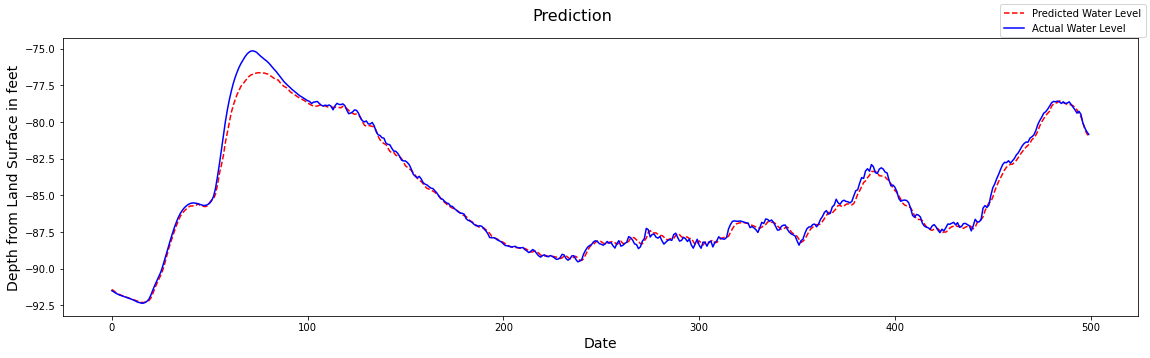

(     Predictions  Actuals
 0      91.410591  91.4921
 1      91.501526  91.5775
 2      91.612381  91.6546
 3      91.692955  91.7333
 4      91.763718  91.7912
 ..           ...      ...
 495    79.635811  79.4696
 496    80.021965  80.0721
 497    80.469780  80.4046
 498    80.787804  80.6565
 499    80.967079  80.8423
 
 [500 rows x 2 columns],
 0.15811325883790314)

In [46]:
model4 = load_model('meremodel4/')
plot_predictions1(model4, X2_test, y2_test)

so in this simple multivariable model, I'm gettting test error for the last 500 days as .1

I DO think something is wrong with how this tutorial does the windows, I think it's using the test data to predict the test data which is a no no, so I'm going to try a recursive fix. This is going to be very hacked together; I'll actually beat my face against the official tensorflow tutorial later, but for now am going to use a fixed version of the recursive thing from here https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing

# Recursive fix?

I think the big issue is with how the windows are created. I think they're fine for the training (and maybe even for the validation?? that feels sketchy too) but very bad for the test. Broadly, I think the windows for the training should be

```
 inputs (real data)                                                            labels (real data)
[[[w1, ys1, yc1, g1, p1], [w2, ys2, yc2, g2, p2], [w3, ys3, yc3, g3, p3]],     [w4]
[[[w2, ys2, yc2, g2, p2], [w3, ys3, yc3, g3, p3], [w4, ys4, yc4, g4, p4]],     [w5]
[[[w3, ys3, yc3, g3, p3], [w4, ys4, yc4, g4, p4], [w5, ys5, yc5, g5, p5]]]     [w6]
```

and testing should be similar, but should start using the predictions
```
 inputs (real data)                                                            labels (predicted)
[[[w1, ys1, yc1, g1, p1], [w2, ys2, yc2, g2, p2], [w3, ys3, yc3, g3, p3]],            [pred4]
[[[w2, ys2, yc2, g2, p2], [w3, ys3, yc3, g3, p3], [pred4, ys4, yc4, g4, p4]],         [pred5]
[[[w3, ys3, yc3, g3, p3], [pred4, ys4, yc4, g4, p4], [pred5, ys5, yc5, g5, p5]]]      [pred6]
```

I think this means I can use the trained model 4 above, but need to build the predictions for the testing recursively, starting by trying to predict the first value in `y2_test` from the last 6 (since that's the window size) in `y2_val` and the relevant other factors

oh, and I'm going to have to scale predictions when I put them in as features

Let's start by rebuilding some things so I have them down here

In [57]:
# defined above, just as a reminder
def df_to_X_y_multi(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - well_training_mean) / well_training_std
    return X

display(well_df.head())

X2, y2 = df_to_X_y_multi(well_df)
X2.shape, y2.shape

,avg_well_depth,Year sin,Year cos,gage_ht,prcp
date,,,,,
2006-02-07,91.0100,0.598115,0.801410,21.65,0.0
2006-02-08,91.0429,0.611813,0.791003,21.64,0.0
2006-02-09,91.1096,0.625329,0.780361,21.58,0.0
2006-02-10,91.1954,0.638660,0.769489,21.46,0.0
2006-02-11,91.3012,0.651802,0.758389,21.36,0.0


((4497, 6, 5), (4497,))

In [58]:
X2_train, y2_train = X2[:3497], y2[:3497]
X2_val, y2_val = X2[3497:3997], y2[3497:3997]
X2_test, y2_test = X2[3997:], y2[3997:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((3497, 6, 5), (3497,), (500, 6, 5), (500,), (500, 6, 5), (500,))

In [62]:
# what does the end of the val set and the beginning of the test set look like
print(X2_val[-1:],'\n', y2_val[-1:])
print('\n\n\n')
print(X2_test[:1],'\n', y2_test[:1])

[[[9.07738000e+01 2.65195165e-01 9.64194754e-01 1.89200000e+01
   0.00000000e+00]
  [9.08908000e+01 2.81741935e-01 9.59490220e-01 1.88700000e+01
   2.40000000e-01]
  [9.10012000e+01 2.98205330e-01 9.54501745e-01 1.88900000e+01
   4.10000000e-01]
  [9.11050000e+01 3.14580477e-01 9.49230806e-01 1.88600000e+01
   0.00000000e+00]
  [9.12146000e+01 3.30862531e-01 9.43678963e-01 1.88700000e+01
   0.00000000e+00]
  [9.13029000e+01 3.47046673e-01 9.37847859e-01 1.88900000e+01
   3.00000000e-02]]] 
 [91.3988]




[[[9.08908000e+01 2.81741935e-01 9.59490220e-01 1.88700000e+01
   2.40000000e-01]
  [9.10012000e+01 2.98205330e-01 9.54501745e-01 1.88900000e+01
   4.10000000e-01]
  [9.11050000e+01 3.14580477e-01 9.49230806e-01 1.88600000e+01
   0.00000000e+00]
  [9.12146000e+01 3.30862531e-01 9.43678963e-01 1.88700000e+01
   0.00000000e+00]
  [9.13029000e+01 3.47046673e-01 9.37847859e-01 1.88900000e+01
   3.00000000e-02]
  [9.13988000e+01 3.63128115e-01 9.31739219e-01 1.88900000e+01
   2.00000000e-01

In [65]:
X2_test[0,-1,0], X2_test[0][-1,0]

(91.3988, 91.3988)

ok, so it looks like, given the way this is built, I actually don't need the val set at all, just the first row of the test set, so I'll scale the whole test set, then I'll 

* predict the first target of the test set from the first row of the test set
    - store that
* scale the prediction, make a new row from `X2_test[1]` but changing the last entry to have the prediction

for actual predictions, I'll have to make a slight change to how the rows are built because I won't be replacing things, but putting them in in the first place. (maybe I can just fill some NaNs with zeros for the well data in the df and then just replace them??)

In [67]:
well_training_mean = np.mean(X2_train[:, :, 0])
well_training_std = np.std(X2_train[:, :, 0])

# again defined above, but keeping it close
# does a whole df, not just one val
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - well_training_mean) / well_training_std
    return X

preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.54167390e-01,  2.81741935e-01,  9.59490220e-01,
          1.88700000e+01,  2.40000000e-01],
        [ 1.85938003e-01,  2.98205330e-01,  9.54501745e-01,
          1.88900000e+01,  4.10000000e-01],
        [ 2.15809287e-01,  3.14580477e-01,  9.49230806e-01,
          1.88600000e+01,  0.00000000e+00],
        [ 2.47349679e-01,  3.30862531e-01,  9.43678963e-01,
          1.88700000e+01,  0.00000000e+00],
        [ 2.72760415e-01,  3.47046673e-01,  9.37847859e-01,
          1.88900000e+01,  3.00000000e-02],
        [ 3.00358258e-01,  3.63128115e-01,  9.31739219e-01,
          1.88900000e+01,  2.00000000e-01]],

       [[ 1.85938003e-01,  2.98205330e-01,  9.54501745e-01,
          1.88900000e+01,  4.10000000e-01],
        [ 2.15809287e-01,  3.14580477e-01,  9.49230806e-01,
          1.88600000e+01,  0.00000000e+00],
        [ 2.47349679e-01,  3.30862531e-01,  9.43678963e-01,
          1.88700000e+01,  0.00000000e+00],
        [ 2.72760415e-01,  3.47046673e-01,  9.37847859e-01,
  

In [71]:
justone = X2_test[-1].reshape(1,6,5)
model4.predict(justone).flatten()

1/1 [==============================] - 0s 12ms/step


array([80.967094], dtype=float32)

In [72]:
def plot_predictions2(predictions, y):
    #predictions = model.predict(X).flatten()
    # now it just plots
    df_plot = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    
    Pred = df_plot.Predictions.values*-1
    Act = df_plot.Actuals.values*-1
    
    fig, ax1 = plt.subplots(figsize=(16, 5)) 
    plt.suptitle('Prediction', fontsize=16)

    ax1 = plt.subplot()
    plt.plot(Pred, 'r--', label = 'Predicted Water Level')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Depth from Land Surface in feet', fontsize=14)

    ax2 = plt.subplot()
    ax2.plot(Act, 'b-', label = 'Actual Water Level')

    fig.legend()

    fig.tight_layout()
    plt.show()
    
    return df_plot, mse(y, predictions)

In [66]:
def newrow(row, pred):
    row[-1,0] = (pred - well_training_mean) / well_training_std
    return row

In [82]:
row = X2_test[0]
recur_preds = []

for i in range(1,500): #since the size of the test set
    row = row.reshape(1,6,5)
    
    # make and store prediction
    pred = model4.predict(row).flatten()[0]
    recur_preds.append(pred)
    
    # scale prediction and insert into the next row
    row = newrow(X2_test[i], pred)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


In [83]:
len(recur_preds), len(y2_test) #one extra in y2_test because of the way the windows work

(499, 500)

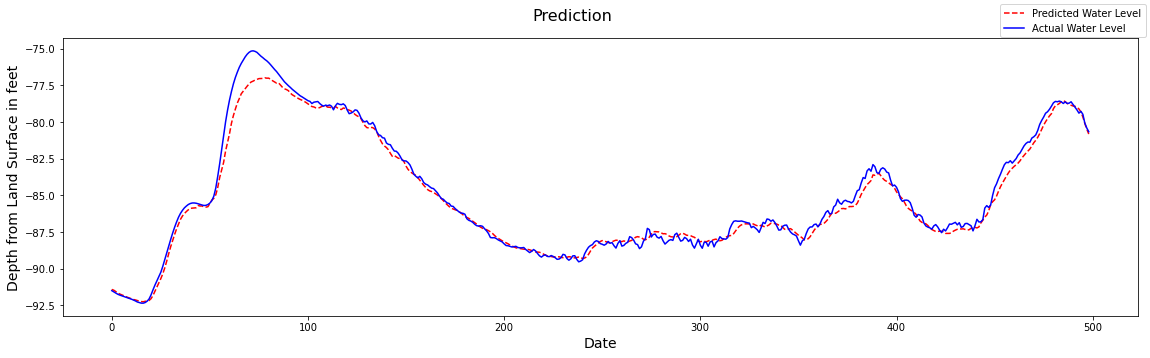

(     Predictions  Actuals
 0      91.410591  91.4921
 1      91.460915  91.5775
 2      91.553894  91.6546
 3      91.642227  91.7333
 4      91.717621  91.7912
 ..           ...      ...
 494    79.309341  79.2675
 495    79.651772  79.4696
 496    80.092949  80.0721
 497    80.478004  80.4046
 498    80.816704  80.6565
 
 [499 rows x 2 columns],
 0.3132503732900564)

In [84]:
plot_predictions2(recur_preds, y2_test[:-1])